<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,88.479576,87.128752,-0.000205,185.608124,185.609402,-0.001278
1,0.0,1.0,72.361945,30.843561,-0.001216,113.204290,113.205103,-0.000813
2,0.0,2.0,48.670359,70.076269,-0.000741,128.745887,128.744957,0.000930
3,0.0,3.0,91.143672,75.143007,-0.001045,176.285634,176.287840,-0.002205
4,0.0,4.0,21.545550,57.602513,-0.000662,89.147400,89.144515,0.002885
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.515443,87.802855,0.001345,150.319642,150.318479,0.001162
29996,999.0,26.0,58.054354,72.511396,-0.000476,140.565275,140.566309,-0.001035
29997,999.0,27.0,70.248226,88.060066,0.001157,168.309449,168.307686,0.001762
29998,999.0,28.0,96.824930,50.743018,0.000010,157.567957,157.567687,0.000270


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,88.479576,87.128752,-0.000205,185.608124,185.609402,-0.001278
1,0.0,1.0,72.361945,30.843561,-0.001216,113.204290,113.205103,-0.000813
2,0.0,2.0,48.670359,70.076269,-0.000741,128.745887,128.744957,0.000930
3,0.0,3.0,91.143672,75.143007,-0.001045,176.285634,176.287840,-0.002205
4,0.0,4.0,21.545550,57.602513,-0.000662,89.147400,89.144515,0.002885
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.515443,87.802855,0.001345,150.319642,150.318479,0.001162
29996,999.0,26.0,58.054354,72.511396,-0.000476,140.565275,140.566309,-0.001035
29997,999.0,27.0,70.248226,88.060066,0.001157,168.309449,168.307686,0.001762
29998,999.0,28.0,96.824930,50.743018,0.000010,157.567957,157.567687,0.000270


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    88.479576  87.128752 -0.000205  185.608124  185.609402 -0.001278
      1.0    72.361945  30.843561 -0.001216  113.204290  113.205103 -0.000813
      2.0    48.670359  70.076269 -0.000741  128.745887  128.744957  0.000930
      3.0    91.143672  75.143007 -0.001045  176.285634  176.287840 -0.002205
      4.0    21.545550  57.602513 -0.000662   89.147400   89.144515  0.002885
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.515443  87.802855  0.001345  150.319642  150.318479  0.001162
      26.0   58.054354  72.511396 -0.000476  140.565275  140.566309 -0.001035
      27.0   70.248226  88.060066  0.001157  168.309449  168.307686  0.001762
      28.0   96.824930  50.743018  0.000010  157.567957  157.567687  0.000270
      29.0   87.823795  38.835668  0.000755  136.660218  136.660079  0.000139

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    88.479576  87.128752 -0.000205  185.608124  185.609402 -0.001278
      1.0    72.361945  30.843561 -0.001216  113.204290  113.205103 -0.000813
      2.0    48.670359  70.076269 -0.000741  128.745887  128.744957  0.000930
      3.0    91.143672  75.143007 -0.001045  176.285634  176.287840 -0.002205
      4.0    21.545550  57.602513 -0.000662   89.147400   89.144515  0.002885
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.515443  87.802855  0.001345  150.319642  150.318479  0.001162
      26.0   58.054354  72.511396 -0.000476  140.565275  140.566309 -0.001035
      27.0   70.248226  88.060066  0.001157  168.309449  168.307686  0.001762
      28.0   96.824930  50.743018  0.000010  157.567957  157.567687  0.000270
      29.0   87.823795  38.835668  0.000755  136.660218  136.660079  0.000139

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,88.479576,87.128752,-0.000205,185.608124,185.609402,-0.001278
1,0.0,1.0,72.361945,30.843561,-0.001216,113.204290,113.205103,-0.000813
2,0.0,2.0,48.670359,70.076269,-0.000741,128.745887,128.744957,0.000930
3,0.0,3.0,91.143672,75.143007,-0.001045,176.285634,176.287840,-0.002205
4,0.0,4.0,21.545550,57.602513,-0.000662,89.147400,89.144515,0.002885
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.515443,87.802855,0.001345,150.319642,150.318479,0.001162
29996,999.0,26.0,58.054354,72.511396,-0.000476,140.565275,140.566309,-0.001035
29997,999.0,27.0,70.248226,88.060066,0.001157,168.309449,168.307686,0.001762
29998,999.0,28.0,96.824930,50.743018,0.000010,157.567957,157.567687,0.000270


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    88.479576  87.128752 -0.000205  185.608124  185.609402 -0.001278
      1.0    72.361945  30.843561 -0.001216  113.204290  113.205103 -0.000813
      2.0    48.670359  70.076269 -0.000741  128.745887  128.744957  0.000930
      3.0    91.143672  75.143007 -0.001045  176.285634  176.287840 -0.002205
      4.0    21.545550  57.602513 -0.000662   89.147400   89.144515  0.002885
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.515443  87.802855  0.001345  150.319642  150.318479  0.001162
      26.0   58.054354  72.511396 -0.000476  140.565275  140.566309 -0.001035
      27.0   70.248226  88.060066  0.001157  168.309449  168.307686  0.001762
      28.0   96.824930  50.743018  0.000010  157.567957  157.567687  0.000270
      29.0   87.823795  38.835668  0.000755  136.660218  136.660079  0.000139

[30000 rows x 6 columns]

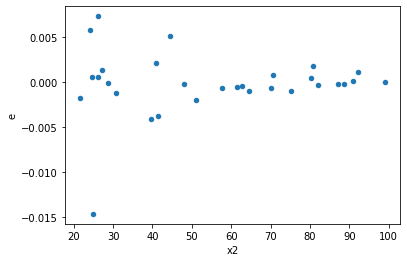

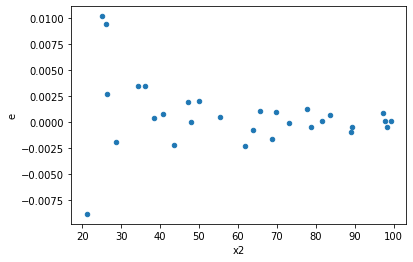

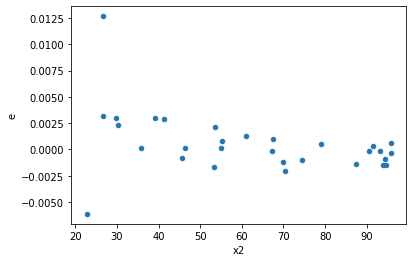

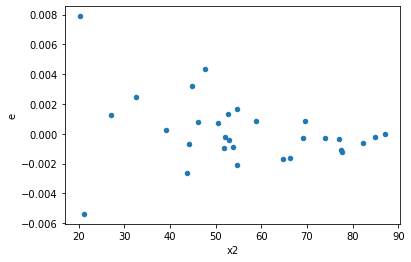

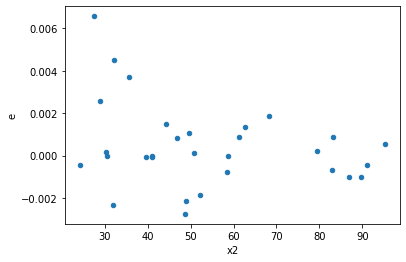

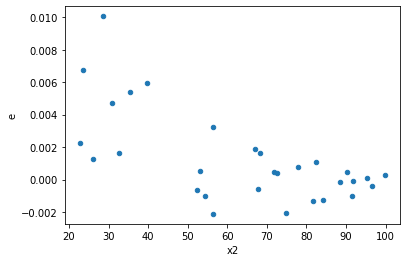

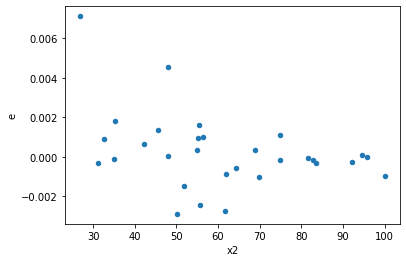

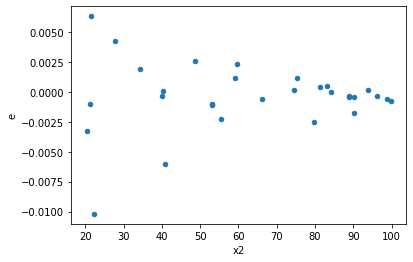

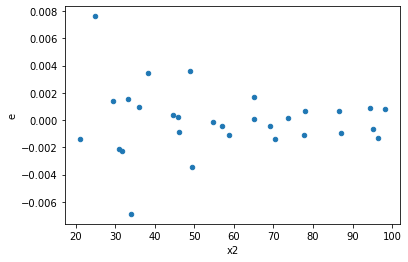

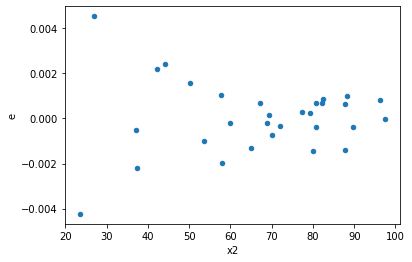

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
21.0,10.0,10.0,6.790694950247122e-05,9.20579588044063e-05,6.790694950247122e-06,9.20579588044063e-06,1.3556485673245593,0.6395180895456494,0.6802409552271753,0.3197590447728247,Reject001=1 : Homoscedasticity
23.0,10.0,10.0,0.00010177703319028982,0.00010397054192866417,1.0177703319028982e-05,1.0397054192866417e-05,1.0215520994237788,0.9737675162096449,0.5131162418951776,0.48688375810482243,Reject001=1 : Homoscedasticity
29.0,10.0,10.0,2.0009624388522552e-05,2.503872091003925e-05,2.0009624388522552e-06,2.5038720910039247e-06,1.2513338793306568,0.7297808719874426,0.6351095640062787,0.3648904359937213,Reject001=1 : Homoscedasticity
41.0,10.0,10.0,3.921123645820347e-05,3.926614121394348e-05,3.921123645820347e-06,3.926614121394348e-06,1.0014002301559282,0.9982782670859445,0.5008608664570278,0.49913913354297224,Reject001=1 : Homoscedasticity
63.0,10.0,10.0,3.5714615812661305e-05,0.00014235656208457713,3.5714615812661304e-06,1.4235656208457713e-05,3.9859468972394727,0.03963033521450465,0.9801848323927477,0.019815167607252326,Reject001=1 : Homoscedasticity
65.0,10.0,10.0,1.5067287314137014e-05,3.291117112908959e-05,1.5067287314137013e-06,3.2911171129089586e-06,2.1842797872587454,0.23387361623657,0.883063191881715,0.116936808118285,Reject001=1 : Homoscedasticity
101.0,10.0,10.0,2.093738355174024e-05,2.536983766704833e-05,2.093738355174024e-06,2.536983766704833e-06,1.2117004784458696,0.7672968927638193,0.6163515536180904,0.38364844638190965,Reject001=1 : Homoscedasticity
131.0,10.0,10.0,4.941385065869581e-05,5.490595064789627e-05,4.941385065869581e-06,5.490595064789627e-06,1.1111449505753903,0.8709172109850296,0.5645413945074852,0.4354586054925148,Reject001=1 : Homoscedasticity
135.0,10.0,10.0,2.3019026996429666e-05,2.70651858170495e-05,2.3019026996429667e-06,2.70651858170495e-06,1.175774537353269,0.8029079176262175,0.5985460411868913,0.40145395881310875,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.00019554887528979318,8.784734730411109e-06,1.955488752897932e-05,8.784734730411109e-07,0.04492347356839865,3.199398529958876e-05,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,0.000223021111736081,7.567610919809555e-06,2.23021111736081e-05,7.567610919809555e-07,0.033932262559810585,8.5879923697864e-06,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,0.00019738151642873482,8.844870498363253e-06,1.9738151642873483e-05,8.844870498363253e-07,0.04481103731694512,3.162382935866568e-05,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,0.00010357620001621423,6.172676962776443e-06,1.0357620001621423e-05,6.172676962776443e-07,0.05959551481720847,0.00011710033587167199,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,5.1842957210857794e-05,1.696158359547185e-05,5.1842957210857796e-06,1.696158359547185e-06,0.32717237804327026,0.09253284401483196,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,7.652428854013782e-05,1.7055569455059572e-05,7.652428854013781e-06,1.7055569455059571e-06,0.22287785721932904,0.026368583212576575,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,4.085318326908608e-05,9.468954222499742e-06,4.085318326908608e-06,9.468954222499743e-07,0.2317800833323305,0.030231407734807328,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,0.00012714215299242036,1.0973433629836452e-05,1.2714215299242036e-05,1.0973433629836452e-06,0.08630838295219555,0.0006071217248349888,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,8.42273355740882e-05,1.1184005838866862e-05,8.42273355740882e-06,1.1184005838866862e-06,0.1327835644169127,0.0037043300971098428,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    619
Reject001=1 : Homoscedasticity      381
Name: Result_test, dtype: int64